In [49]:
import os
env_vars = !cat .env
for var in env_vars:
    key, value = var.split('=')
    os.environ[key] = value

In [50]:
STABILITY_AI_KEY = os.environ["stability_ai_secret"]

In [51]:
import requests
import json

In [42]:
def generate_image_from_text(prompt=''):
    if prompt == '': return
    if STABILITY_AI_KEY is None:
        raise Exception("Missing Stability API key.")

    response = requests.post(
        f"{api_host}/v1/generation/{engine_id}/text-to-image",
        headers={
            "Content-Type": "application/json",
            "Accept": "application/json",
            "Authorization": f"Bearer {STABILITY_AI_KEY}"
        },
        json={
            "text_prompts": [
                {
                    "text": "Doraemon with many cat with Japanese Anime Style"
                }
            ],
            "cfg_scale": 7,
            "clip_guidance_preset": "FAST_BLUE",
            "height": 512,
            "width": 512,
            "samples": 1,
            "steps": 30,
        },
    )

    if response.status_code != 200:
        raise Exception("Non-200 response: " + str(response.text))

    return response.json()

In [43]:
data = generate_image_from_text(prompt="Doraemon with many cat with Japanese Anime Style")
print(data)

{'artifacts': [{'base64': 'iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAIAAAB7GkOtAAACkGVYSWZNTQAqAAAACAAGAQAABAAAAAEAAAIAAQEABAAAAAEAAAIAAQ4AAgAAADEAAABWARAAAgAAABQAAACIATEAAgAAAA0AAACckhMAAQAAAeUAAACqAAAAAERvcmFlbW9uIHdpdGggbWFueSBjYXQgd2l0aCBKYXBhbmVzZSBBbmltZSBTdHlsZQAAc3RhYmlsaXR5LWRpZmZ1c2lvbgBzdGFiaWxpdHkuYWkAADNrRVM3dnBCNDplTzVOY3d7NWZlei9kZElmIUNsfWNzT11BZ0NAU052TDZyQWk1Sm9BaC1DdDJ2TXV0N2VOQHJIZyt7JDBoLTlpRWl4dyZoMHUjPCQwMio0KjFxN00tMCQyYnc9antWLzVpe045NUFYXU0zaUg8ITFwdGt4LnV7Ukw1d09bPTAkLSYuM2lIPE1jamY/Xi13ZD01NXZxXU8xcTdQOjAkKUtDQi1STlJCOD4renZxe2ZzeT9XdWlCOTcmMXk/bCU6eD55JDFCN11NZ2ZscWV6ZmtVU3JCLj5TZ2ZsemJGd08jamR3UHhvbzBzamhVNXA6KTQxK0xLZ311IXRDYygkYkIyTkFGJjB0ay5HMDA0S2xlRHQhZWtROFAlMk0+WjcwdGtAMDRQV3B5ZUw0REZnK3lwKHovb2UwNSY3MjB4JkRWVGVJUDdsZVBrUHR6RUVrKDdDVi5heCZEVkplSS9kbGVPWzxmei9kc3R1VTdASTlOaC80alQ3angwMDAwLTYtWGs6a29abXUwMDAwLWRIY0heOU5oLzRqI2EoYWZIUCYxdnA6cF16eEtkcUJ6OCFsdnFadWt2eyVFNEN3aGVqYXdjNll2cVlUJHdHVG9SeChkQTdxLylxM3dEaFlnAHvtYQYAAQAASURBVHictP15uG5ZUhaIxxux1t77G858h

In [44]:
from IPython.display import display, HTML
def display_image(data):
    for i, image in enumerate(data["artifacts"]):
       display(HTML(f'<img src="data:image/png;base64,{image["base64"]}" />'))


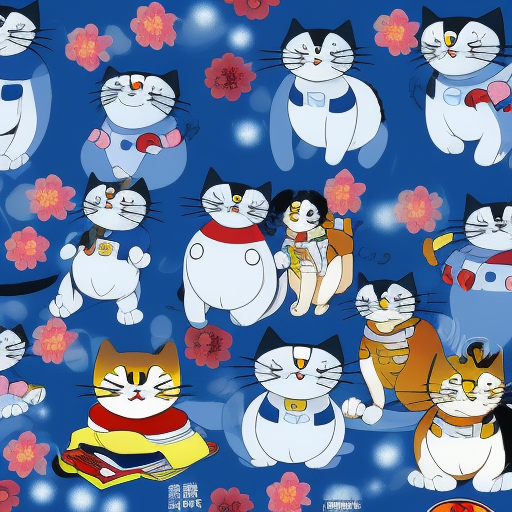

In [45]:
display_image(data)

In [58]:
url = "https://stablediffusionapi.com/api/v3/img2img"

response = requests.post(
    url,
    headers={
        "Content-Type": "application/json",
        "Accept": "application/json",
        "Authorization": f"Bearer {STABILITY_AI_KEY}"
    },
    json=json.dumps({
      "key": "",
      "prompt": "a cat sitting on a bench",
      "negative_prompt": None,
      "init_image": "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png",
      "width": "512",
      "height": "512",
      "samples": "1",
      "num_inference_steps": "30",
      "safety_checker": "no",
      "enhance_prompt": "yes",
      "guidance_scale": 7.5,
      "strength": 0.7,
      "seed": None,
      "webhook": None,
      "track_id": None
    })
)

print(response.text)

{"status":"error","message":"Invalid API Request","tip":"1. Make sure you are passing Content-Type: application\/json in header. 2. Make sure you are doing POST request with valid JSON. 3. Make sure your JSON does not have error, use jsonlint to validate json array"}
